In [4]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("../data/all_reviews.pkl","rb") as f:
    reviews = pickle.load(f)
    
job_filter = pd.read_csv("../data/filter_job_titles.csv")

job_filters = job_filter.clean_job_title.tolist()

idx = reviews.clean_job_title.isin(job_filters)
reviews = reviews.loc[idx,:]

print( reviews.shape )
display( reviews.head() )
reviews.reset_index(drop=True,inplace=True)


(43209, 15)


,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful,industry,clean_job_title,language
92,EY,I had a great time working at EY,Software Developer,Former Employee,"Bengaluru, Karnataka",2020-03-02,Pros:\rGreat Learning Curve.\rPeer Culture is ...,NaN,NaN,4.0,0,0,accounting,software developer,en
115,EY,Productive and FUN Place,System Engineer,Current Employee,"Hyderabad, Telangana",2020-02-25,It's feel like workplace where can utilize kno...,NaN,NaN,5.0,0,0,accounting,system engineer,en
427,EY,Really Productive Gain a lot of knowledge and ...,Network Engineer,Former Employee,Capital Territory,2019-11-13,Enjoy Working There it really help.They Provid...,NaN,NaN,5.0,0,0,accounting,network engineer,en
438,EY,A good place to work as fresher,SOFTWARE ENGINEER,Current Employee,"Bengaluru, Karnataka",2019-11-11,"helping team, good work culture, we get to lea...",NaN,NaN,4.0,5,0,accounting,software engineer,en
507,EY,Good place to work for Seniors and above,Senior Software Engineer,Former Employee,"Bengaluru, Karnataka",2019-10-21,Good place to work for Seniors and above by co...,NaN,NaN,4.0,0,1,accounting,software engineer,en


In [52]:
 reviews.groupby(['industry'])[['job_title']].describe()

job_title                                       
                         count unique                       top  freq
industry                                                             
IT_services              28324   2311         Software Engineer  4552
accounting                 351    177  Senior Software Engineer    20
automotive                1037    297         Software Engineer   136
computer_software         2384    512         Software Engineer   392
construction               212    110                IT Manager    11
education_management       561    224     Network Administrator    35
financial                 4675    941         Software Engineer   425
higher_ed                  783    283             Web Developer    49
hospital_care             2320    609         Software Engineer   195
retail                    2562    621        Support Specialist   157

In [54]:
len(set(reviews.job_title))

3716

In [2]:
#reviews per industry
reviews.groupby(['industry']).size()

industry
IT_services             28324
accounting                351
automotive               1037
computer_software        2384
construction              212
education_management      561
financial                4675
higher_ed                 783
hospital_care            2320
retail                   2562
dtype: int64

industry
IT_services             [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
accounting              [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
automotive              [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
computer_software       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
construction            [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
education_management    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
financial               [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
higher_ed               [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
hospital_care           [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
retail                  [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

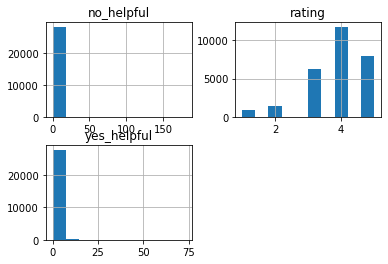

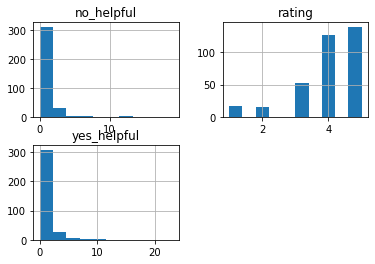

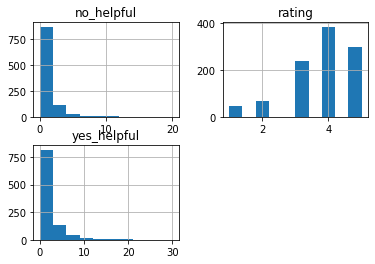

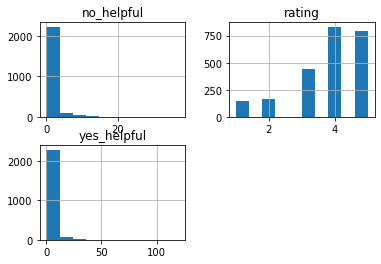

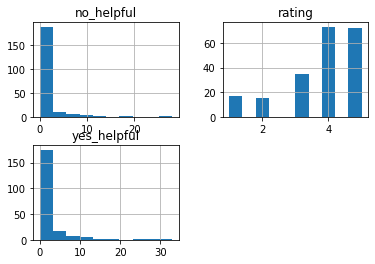

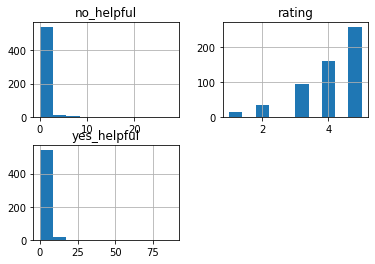

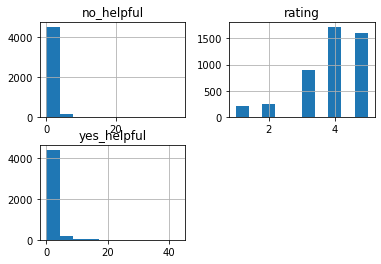

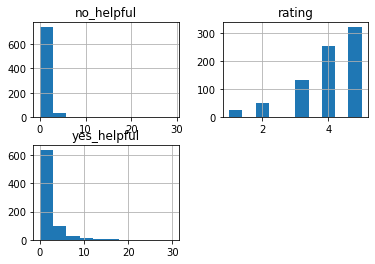

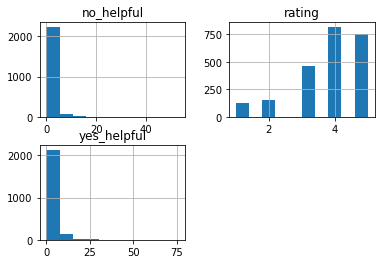

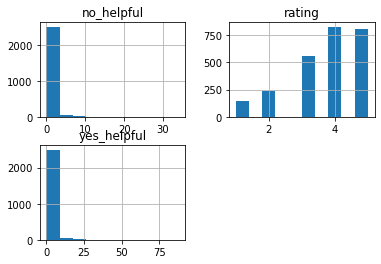

In [3]:
reviews.groupby(['industry']).hist()

In [66]:
# No of reviews for former/current employee status per industry
reviews.groupby(['employee_status','industry']).size()/reviews.groupby(['industry']).size()

employee_status   industry            
Current Employee  IT_services             0.486019
                  accounting              0.450142
                  automotive              0.427194
                  computer_software       0.426174
                  construction            0.358491
                  education_management    0.372549
                  financial               0.416043
                  higher_ed               0.485313
                  hospital_care           0.446121
                  retail                  0.357533
Former Employee   IT_services             0.513981
                  accounting              0.549858
                  automotive              0.572806
                  computer_software       0.573826
                  construction            0.641509
                  education_management    0.627451
                  financial               0.583957
                  higher_ed               0.514687
                  hospital_care           0

In [67]:
reviews.groupby(['industry','language']).size()

industry     language
IT_services  af              4
             cy              3
             da              2
             de             13
             en          28058
                         ...  
retail       cy              1
             en           2549
             es             10
             fr              1
             sv              1
Length: 76, dtype: int64

count    43209.000000
mean        40.419913
std         32.702520
min          1.000000
25%         25.000000
50%         31.000000
75%         43.000000
max        317.000000
Name: review, dtype: float64


Text(0.5, 1.0, 'Review Length Distribution')

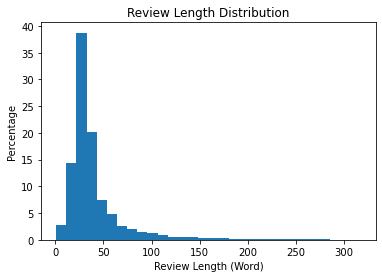

In [129]:

lens = reviews.review.str.split().apply(lambda x: len(x))
print(lens.describe())
plt.hist(lens, weights= 100*(np.ones(len(reviews.review)) / len(reviews.review)), bins = 30)  # `density=False` would make counts
plt.ylabel('Percentage')
plt.xlabel('Review Length (Word)')
plt.title('Review Length Distribution')

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english'))
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
work,39163
good,28643
company,15637
management,12300
great,11193
working,9858
place,9710
job,9217
team,8121
environment,7193


In [70]:
#bi-gram term ferquency
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
place work,4946
work life,4834
life balance,4536
good work,3235
work culture,3111
co workers,2609
good place,2578
part job,2472
good company,2453
work environment,2080


In [71]:
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
reviews['review'] = preprocess(reviews['review'])
#Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] 
#where 1 means positive sentiment and -1 means a negative sentiment.
reviews['polarity'] = reviews['review'].map(lambda text: TextBlob(text).sentiment.polarity)
#Create new feature for the length of the review
reviews['review_len'] = reviews['review'].astype(str).apply(len)
#Create new feature for the word count of the review
reviews['word_count'] = reviews['review'].apply(lambda x: len(str(x).split()))

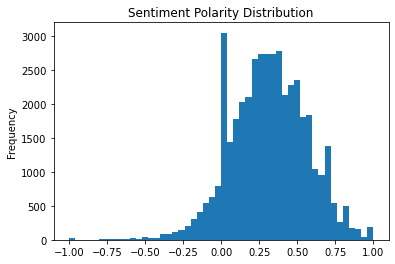

In [72]:
reviews['polarity'].plot(
    kind='hist',
    bins=50,
    title='Sentiment Polarity Distribution')

In [73]:
#polarity average pre industry
reviews.groupby('industry').mean()[['polarity']]

,polarity
industry,
IT_services,0.324514
accounting,0.297008
automotive,0.271245
computer_software,0.302210
construction,0.246506
education_management,0.248124
financial,0.301674
higher_ed,0.297750
hospital_care,0.283810


In [74]:
reviews.groupby('industry').mean()[['rating']]

,rating
industry,
IT_services,3.863720
accounting,4.008547
automotive,3.784957
computer_software,3.820889
construction,3.792453
education_management,4.092692
financial,3.914225
higher_ed,4.022989
hospital_care,3.829310


In [75]:
#review length average per industry
reviews.groupby('industry').mean()[['review_len']]

,review_len
industry,
IT_services,225.575131
accounting,257.307692
automotive,254.980714
computer_software,263.003775
construction,336.882075
education_management,274.983957
financial,251.364706
higher_ed,266.955300
hospital_care,261.903017


In [76]:
#review length average per industry
reviews.groupby('industry').mean()[['word_count']]

,word_count
industry,
IT_services,38.214800
accounting,43.840456
automotive,42.794600
computer_software,44.710570
construction,56.966981
education_management,47.524064
financial,42.165989
higher_ed,45.996169
hospital_care,44.279741


In [77]:
reviews['date'] =  pd.to_datetime(reviews['date'])
reviews.groupby(['industry',reviews.date.dt.year]).mean()[['polarity']]

polarity
industry    date          
IT_services 2011  0.394041
            2012  0.309777
            2013  0.327257
            2014  0.342181
            2015  0.323037
...                    ...
retail      2016  0.285511
            2017  0.269411
            2018  0.241130
            2019  0.234437
            2020  0.229731

[96 rows x 1 columns]

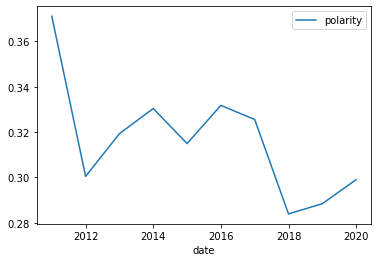

In [15]:
reviews.groupby([reviews.date.dt.year]).mean()[['polarity']].plot()

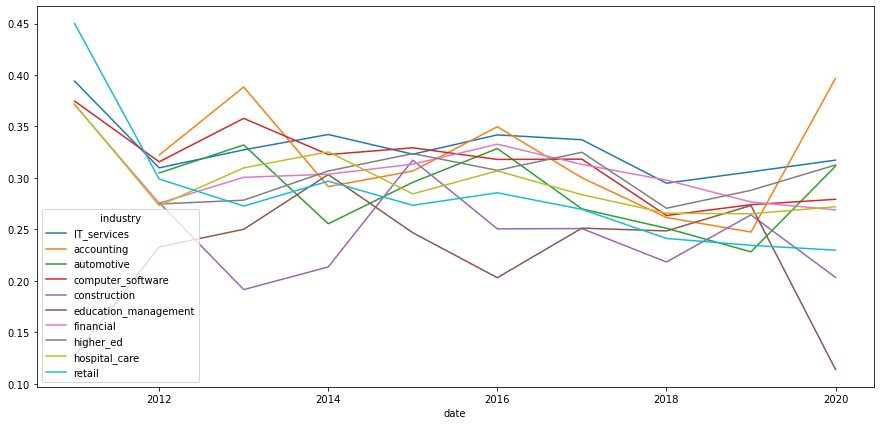

In [16]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews.groupby([reviews.date.dt.year,'industry']).mean()['polarity'].unstack().plot(ax=ax)

In [27]:
reviews.groupby(['industry',reviews.date.dt.year]).mean()[['rating']]

rating
industry    date          
IT_services 2011  3.823529
            2012  3.806002
            2013  3.888243
            2014  3.901911
            2015  3.902317
...                    ...
retail      2016  3.945652
            2017  3.796095
            2018  3.627368
            2019  3.570681
            2020  3.449153

[96 rows x 1 columns]

In [53]:
(reviews.groupby([reviews.date.dt.year]).size()/len(reviews.review))*100

date
2011     0.083316
2012     3.559444
2013     7.570182
2014     9.375362
2015     9.801199
2016    11.148140
2017    24.939249
2018    15.364855
2019    13.712421
2020     4.445833
dtype: float64

In [57]:
reviews.groupby([reviews.date.dt.year,'employee_status']).size()

date  employee_status 
2011  Current Employee       8
      Former Employee       28
2012  Current Employee     705
      Former Employee      833
2013  Current Employee    1663
      Former Employee     1608
2014  Current Employee    2049
      Former Employee     2002
2015  Current Employee    2063
      Former Employee     2172
2016  Current Employee    2420
      Former Employee     2397
2017  Current Employee    5198
      Former Employee     5578
2018  Current Employee    2604
      Former Employee     4035
2019  Current Employee    2376
      Former Employee     3549
2020  Current Employee     858
      Former Employee     1063
dtype: int64

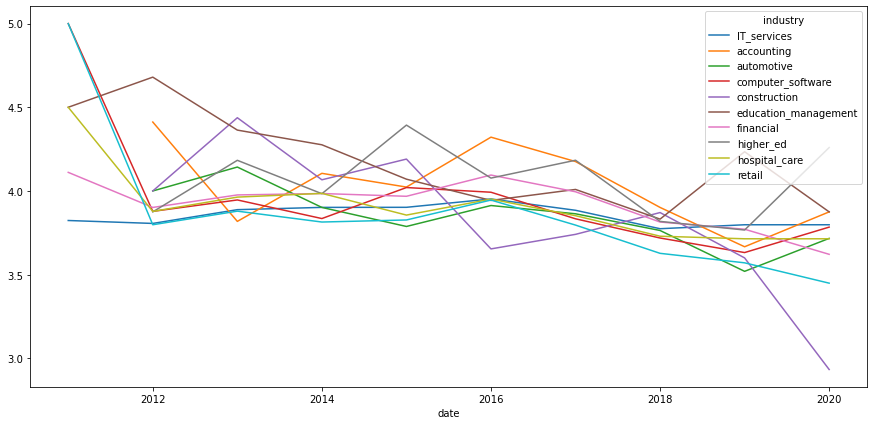

In [17]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews.groupby([reviews.date.dt.year,'industry']).mean()['rating'].unstack().plot(ax=ax)

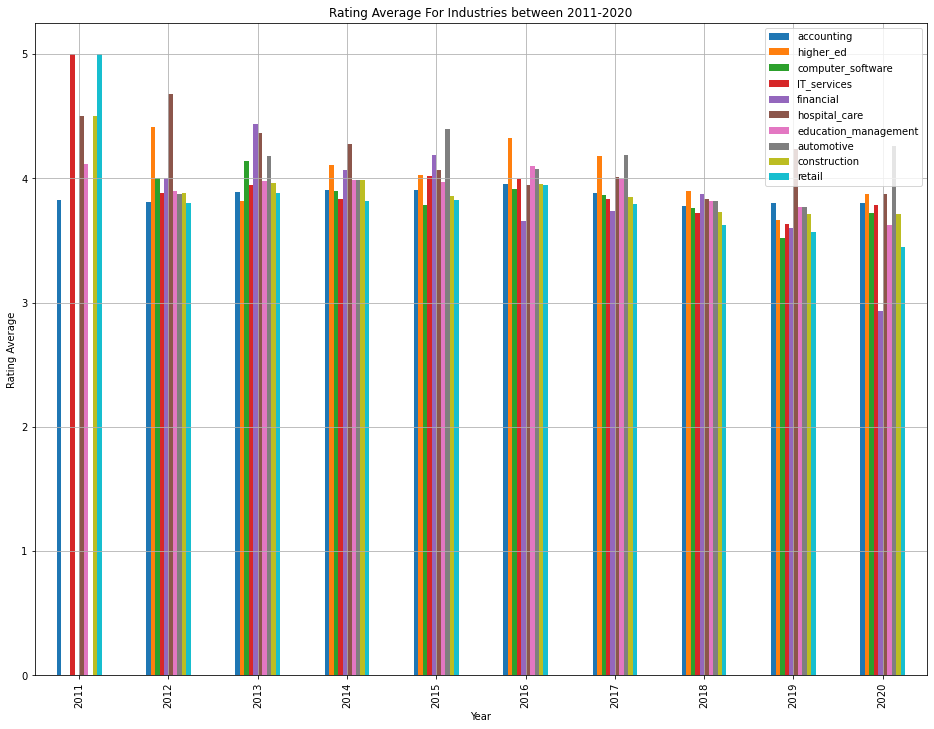

In [135]:
fig, ax = plt.subplots(figsize=(16,12))
reviews.groupby([reviews.date.dt.year,'industry']).mean()['rating'].unstack().plot.bar(ax=ax)
plt.xlabel('Year')
plt.ylabel('Rating Average')
plt.title('Rating Average For Industries between 2011-2020')
ax.legend(set(reviews.industry), loc='upper right')
ax.grid()
plt.show()

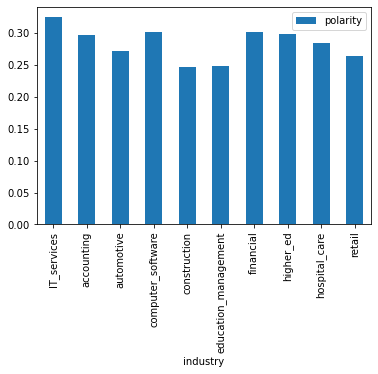

In [18]:
reviews.groupby(['industry']).mean()[['polarity']].plot(kind='bar')

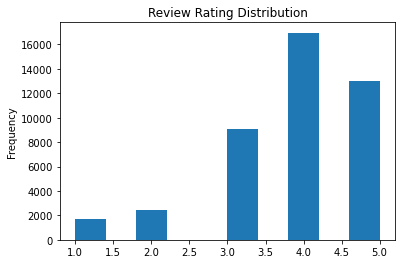

In [19]:
reviews['rating'].plot(
    kind='hist',
    title='Review Rating Distribution')

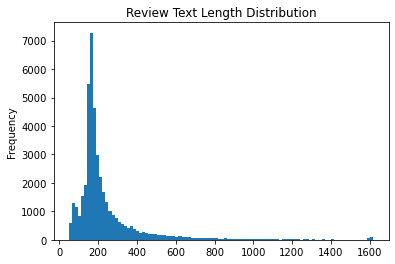

In [20]:
reviews['review_len'].plot(
    kind='hist',
    bins=100,
    title='Review Text Length Distribution')

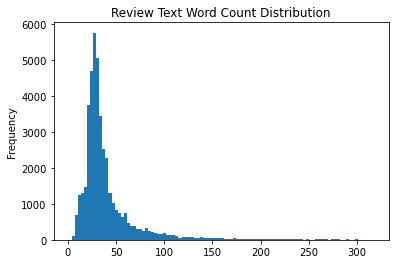

In [21]:
reviews['word_count'].plot(
    kind='hist',
    bins=100,
    title='Review Text Word Count Distribution')

the 63598
and 63322
to 61991
work 39163
is 34839
of 31958
good 28643
in 26329
for 21884
with 21139
you 16684
it 16539
was 16452
company 15637
are 15501
very 13224
management 12300
on 12254
as 11488
my 11335


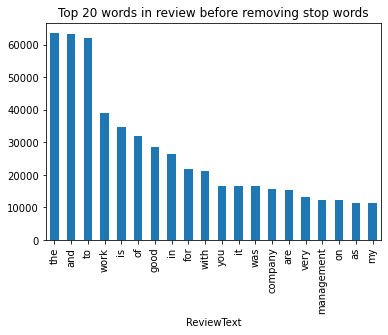

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')

work 39163
good 28643
company 15637
management 12300
great 11193
working 9858
place 9710
job 9217
team 8121
environment 7193
people 6769
culture 6698
life 6690
new 6389
lot 6205
learn 6079
time 5898
balance 5238
experience 4845
employees 4776


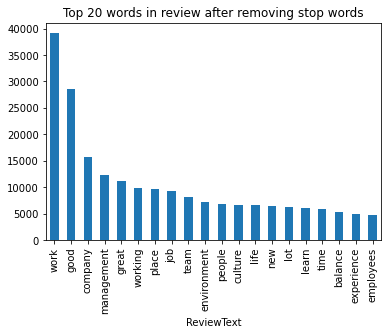

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')


work 39163
good 28643
company 15637
management 12300
great 11193
working 9858
place 9710
job 9217
team 8121
environment 7193
people 6769
culture 6698
life 6690
new 6389
lot 6205
learn 6079
time 5898
balance 5238
experience 4845
employees 4776
date  ReviewText 
2020  work           39163
      good           28643
2019  company        15637
      management     12300
      great          11193
      working         9858
      place           9710
      job             9217
      team            8121
      environment     7193
      people          6769
      culture         6698
2018  life            6690
      new             6389
      lot             6205
      learn           6079
      time            5898
      balance         5238
      experience      4845
      employees       4776
Name: count, dtype: int64


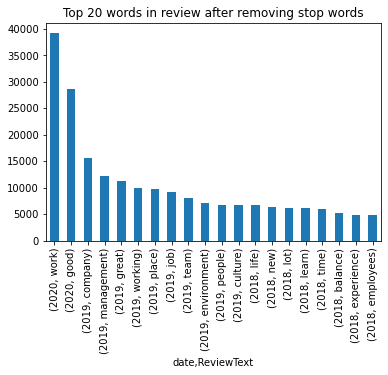

In [51]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby([reviews.date.dt.year,'ReviewText']).sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')
print(df2.groupby([reviews.date.dt.year,'ReviewText']).sum()['count'].sort_values(ascending=False))

to work 13721
of the 7081
place to 6630
work life 4609
life balance 4528
in the 4349
to learn 4025
the company 3982
is good 3903
lot of 3620
part of 3607
work with 3409
very good 3304
work culture 3065
is very 3024
it is 3023
the job 2992
if you 2855
to be 2823
management is 2729


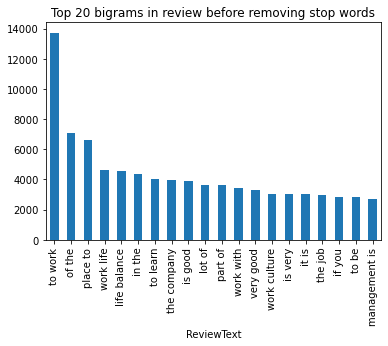

In [24]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')


place work 4962
work life 4837
life balance 4538
good work 3278
work culture 3114
good place 2579
good company 2474
work environment 2083
company work 2064
great place 1977
learn new 1387
management good 1319
hardest job 1290
new technologies 1266
job security 1219
typical day 1210
culture good 1187
work good 1132
learned lot 1105
good management 988


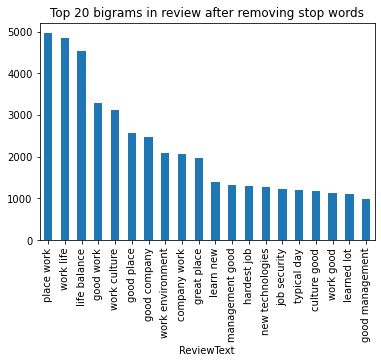

In [25]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')
